In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Saving final_jallianwala_dataset.csv to final_jallianwala_dataset.csv


In [3]:
df = pd.read_csv('final_jallianwala_dataset.csv')
df.head()

,NewsArticles,YouTubeUploads,SearchInterest,InverseDays,DaysSquared,WeightedEvents
0,37,7,17.3,0.002874,120409,0.000000
1,30,4,0.0,0.003155,99856,0.003155
2,37,10,28.7,0.003484,81796,0.000000
3,41,9,36.1,0.003906,65025,0.000000
4,34,12,37.9,0.004444,50176,0.004444


In [4]:
X_train = df.drop('SearchInterest',axis=1)
y_train = df['SearchInterest']
X_train.head()
y_train.head()

,SearchInterest
0,17.3
1,0.0
2,28.7
3,36.1
4,37.9


# Test Train Split

In [5]:
df_shuffled = df.sample(frac=1,random_state=42).reset_index(drop=True)
train_ratio = 0.8
train_size = int(len(df_shuffled) * train_ratio)
train_set = df_shuffled.iloc[:train_size]
test_set = df_shuffled.iloc[train_size:]
feature_cols = ['NewsArticles', 'YouTubeUploads', 'WeightedEvents', 'InverseDays', 'DaysSquared']
target_col = 'SearchInterest'

X_train = train_set[feature_cols].values
y_train = train_set[target_col].values

X_test = test_set[feature_cols].values
y_test = test_set[target_col].values

In [17]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std


#Creating Model
**Cost Function**

In [18]:
def computing_cost(w,x,y,b) :
  m = x.shape[0]
  f_wb = x@w + b
  return 1/2*m*np.sum((f_wb-y)**2)

In [19]:
def compute_gradient(w,x,y,b) :
    m = x.shape[0]
    predictions = x @ w + b
    error = predictions - y

    dj_dw = (1 / m) * (x.T @ error)
    dj_db = (1 / m) * np.sum(error)

    return dj_dw, dj_db

In [80]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    w = w_in.copy()
    b = b_in
    cost_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, x, y, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Always store cost (for full cost curve)
        cost = computing_cost(w, x, y, b)
        cost_history.append(cost)

        # Print cost only every 100 iterations or at the end
        if i % 100 == 0 or i == num_iters - 1:
            print(f"Iteration {i}: Cost {cost:.4f}")

    return w, b, cost_history


In [82]:

m, n = X_train_scaled.shape
w_init = np.zeros(n)
b_init = 0
alpha = 0.02
iterations = 100000
w_final, b_final, cost_hist = gradient_descent(X_train_scaled, y_train, w_init, b_init, alpha, iterations)


Iteration 0: Cost 448342.6777
Iteration 100: Cost 11586.3122
Iteration 200: Cost 4826.7051
Iteration 300: Cost 4495.3632
Iteration 400: Cost 4376.9812
Iteration 500: Cost 4293.3458
Iteration 600: Cost 4221.0860
Iteration 700: Cost 4153.6458
Iteration 800: Cost 4088.9817
Iteration 900: Cost 4026.4185
Iteration 1000: Cost 3965.7073
Iteration 1100: Cost 3906.7346
Iteration 1200: Cost 3849.4318
Iteration 1300: Cost 3793.7452
Iteration 1400: Cost 3739.6271
Iteration 1500: Cost 3687.0327
Iteration 1600: Cost 3635.9189
Iteration 1700: Cost 3586.2438
Iteration 1800: Cost 3537.9671
Iteration 1900: Cost 3491.0492
Iteration 2000: Cost 3445.4519
Iteration 2100: Cost 3401.1382
Iteration 2200: Cost 3358.0718
Iteration 2300: Cost 3316.2176
Iteration 2400: Cost 3275.5415
Iteration 2500: Cost 3236.0104
Iteration 2600: Cost 3197.5920
Iteration 2700: Cost 3160.2550
Iteration 2800: Cost 3123.9689
Iteration 2900: Cost 3088.7043
Iteration 3000: Cost 3054.4322
Iteration 3100: Cost 3021.1249
Iteration 3200: C

# Model Visualization

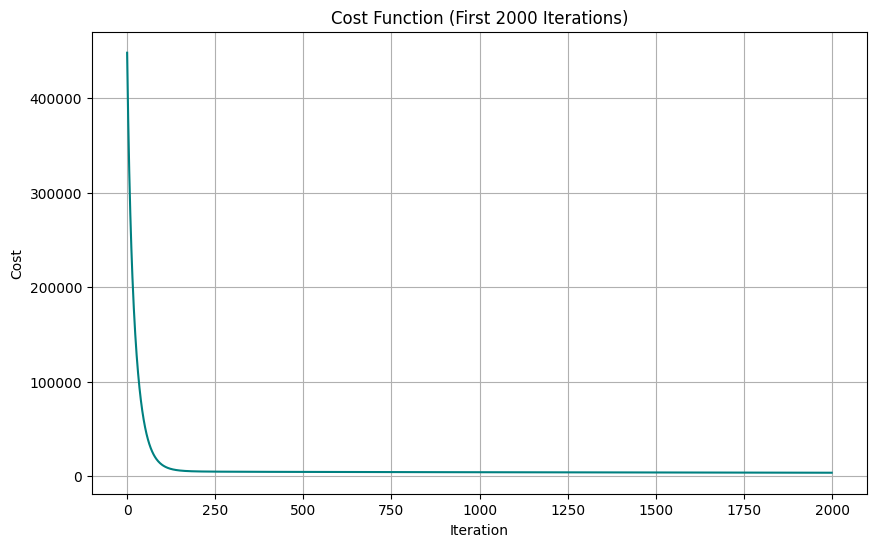

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(range(2000), cost_hist[:2000], color='teal')
plt.title("Cost Function (First 2000 Iterations)")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


# Evaluating the Model

In [67]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [68]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)


In [69]:
y_pred = X_test_scaled @ w_final + b_final

print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


MSE: 143.5946
R² Score: 0.5566


In [105]:
import pickle

# Save model
model_params = {
    'weights': w_final,
    'bias': b_final
}

with open("jallianwala_model.pkl", "wb") as f:
    pickle.dump(model_params, f)

# Save scaler from X_train (unscaled), ensuring arrays
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

# Ensure both are converted to lists before saving
scaler = {
    'mean': mean.tolist(),
    'std': std.tolist()
}

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and scaler saved correctly (as lists)!")

✅ Model and scaler saved correctly (as lists)!


In [106]:
print("w shape:", w_final.shape)
print("mean shape:", np.array(scaler['mean']).shape)
print("std shape:", np.array(scaler['std']).shape)

w shape: (5,)
mean shape: (5,)
std shape: (5,)


In [107]:

# --- Load model ---
with open("jallianwala_model.pkl", "rb") as f:
    model = pickle.load(f)

w = np.array(model['weights'])  # Ensure NumPy format
b = model['bias']

# --- Load scaler ---
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

mean = np.array(scaler['mean'])  # Convert list to ndarray
std = np.array(scaler['std'])

# --- Prediction function ---
def predict(X_raw):
    """
    X_raw: 1D or 2D NumPy array of raw inputs (not scaled)
    Returns: prediction(s)
    """
    X_scaled = (X_raw - mean) / std
    return X_scaled @ w + b


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>